In [1]:
import pandas as pd 
import  numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import folium

            data_id       iso  event_id_no_cnty           year  \
count  1.076900e+05  107690.0     107690.000000  107690.000000   
mean   6.691447e+06     356.0      54021.837339    2018.769356   
std    1.297399e+06       0.0      31161.442146       1.677151   
min    4.568646e+06     356.0          1.000000    2016.000000   
25%    5.489091e+06     356.0      27051.250000    2017.000000   
50%    6.746172e+06     356.0      54026.500000    2019.000000   
75%    7.789147e+06     356.0      81016.750000    2020.000000   
max    8.916063e+06     356.0     107943.000000    2022.000000   

       time_precision         inter1         inter2    interaction  \
count   107690.000000  107690.000000  107690.000000  107690.000000   
mean         1.040607       5.442604       1.135463      50.845046   
std          0.207919       1.260540       2.354539      17.064984   
min          1.000000       1.000000       0.000000      10.000000   
25%          1.000000       5.000000       0.000000    

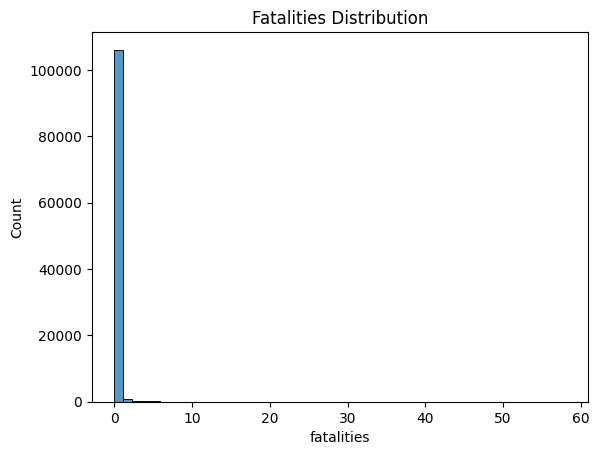

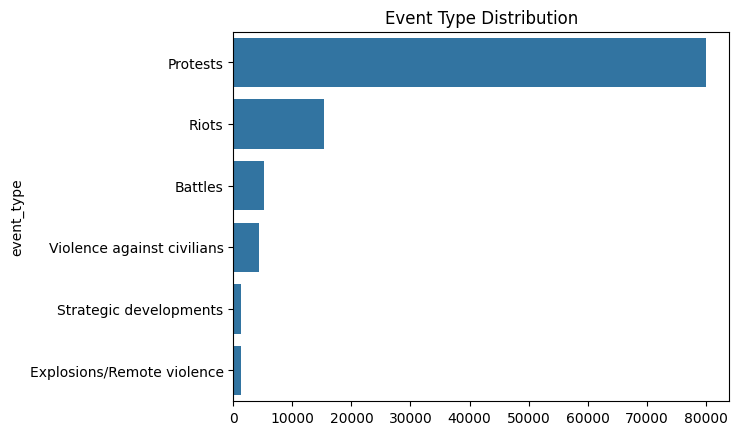

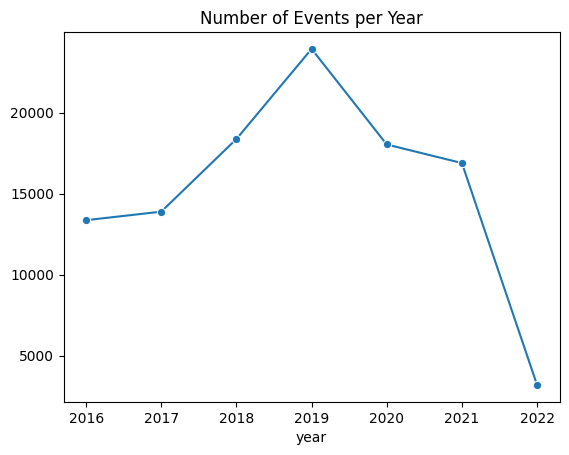

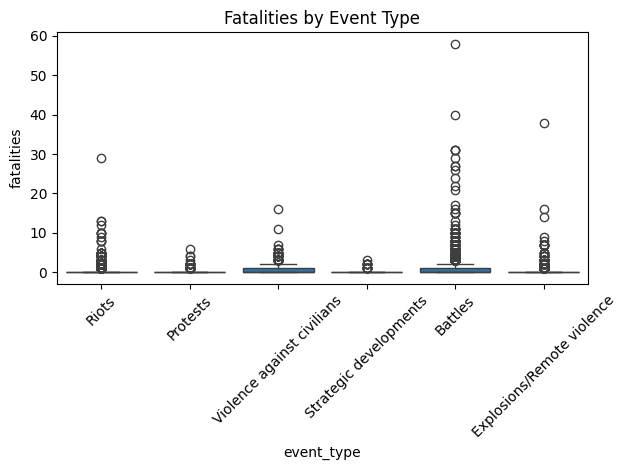

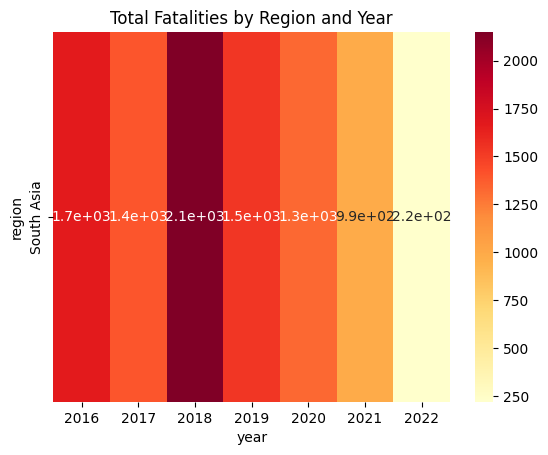

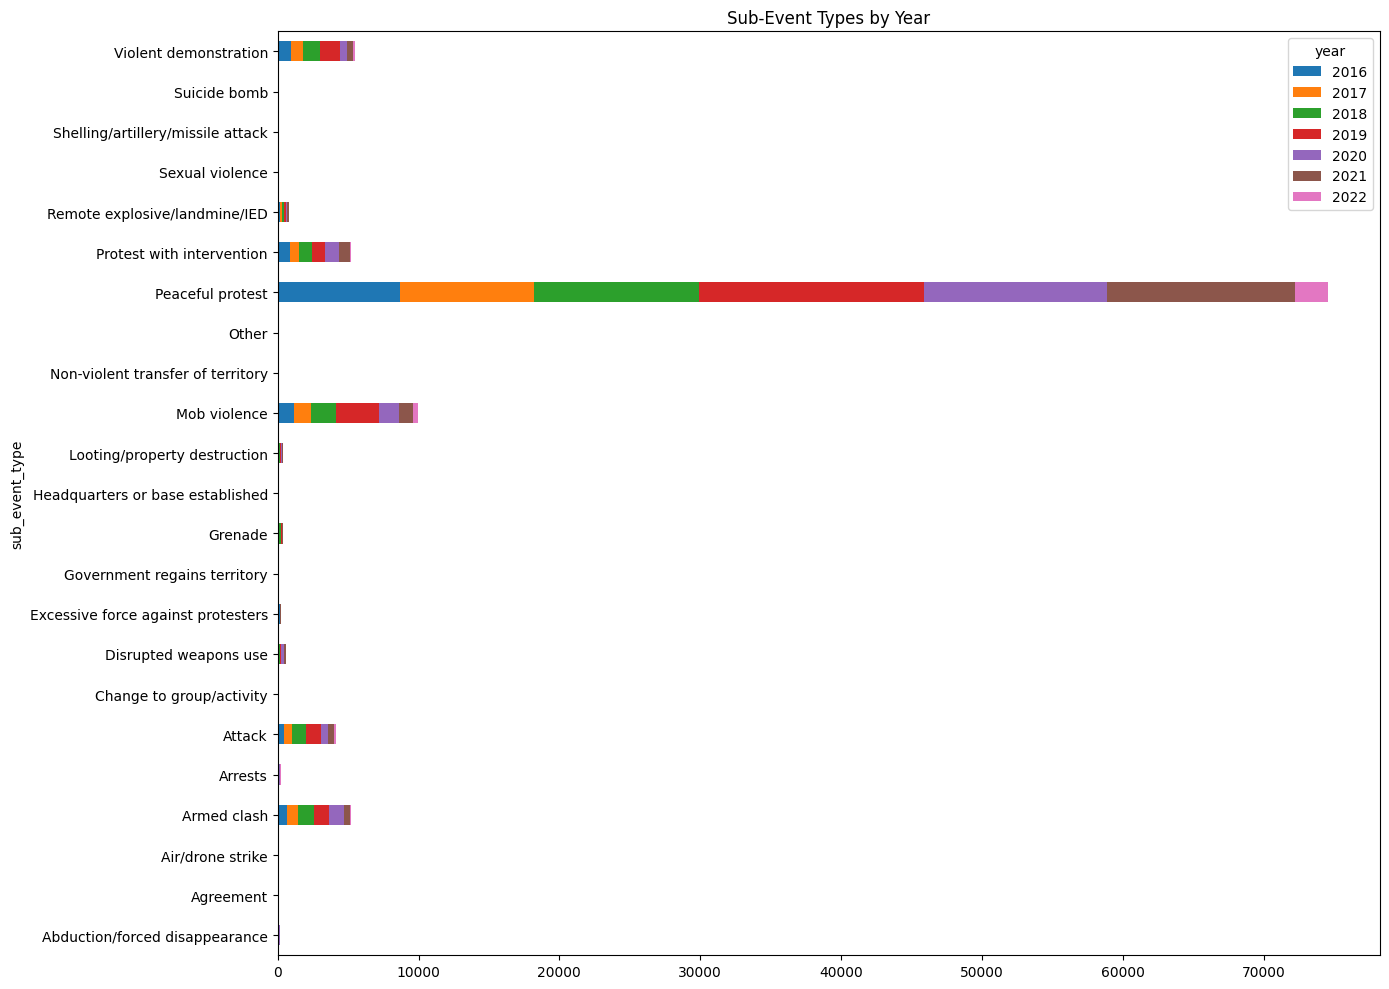

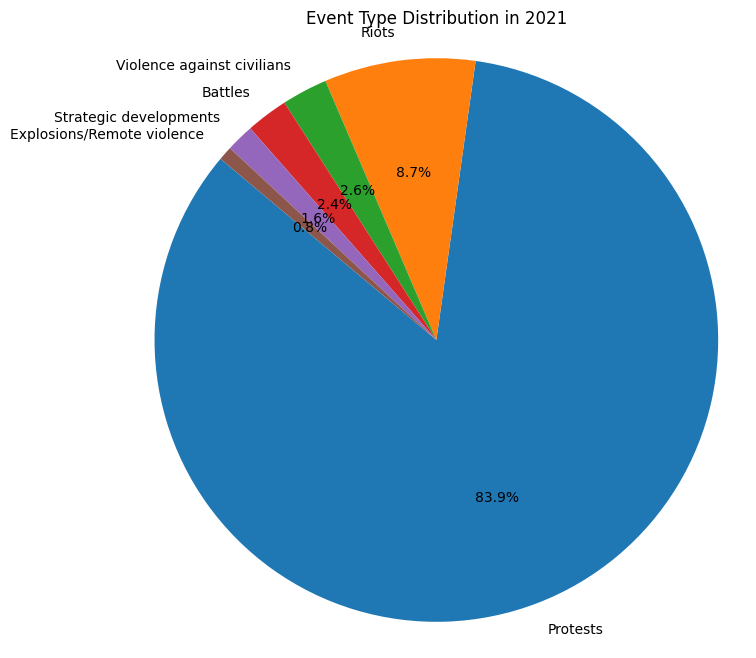

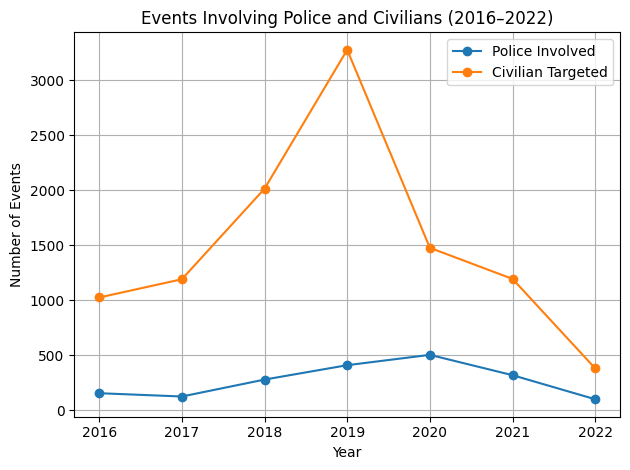

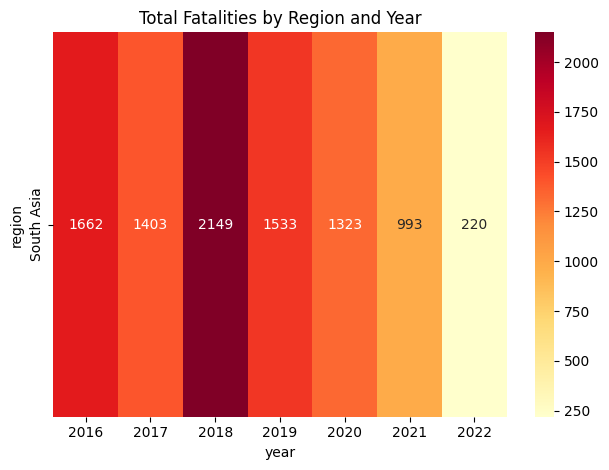

In [2]:
# 📘 Data Visualization Project Summary

# ================================
# 📦 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# For inline plotting in Jupyter
%matplotlib inline

# ================================
# 📂 2. Load Dataset
# ================================
df = pd.read_csv("2016-2022.csv")

# ================================
# 🔹 Unit I: Statistics and Python Basics
# ================================

# Descriptive Statistics
print(df.describe())

# Histogram: Fatalities Distribution
sns.histplot(df['fatalities'], bins=50)
plt.title("Fatalities Distribution")
plt.show()

# Event Type Distribution
event_type_counts = df['event_type'].value_counts()
sns.barplot(x=event_type_counts.values, y=event_type_counts.index)
plt.title("Event Type Distribution")
plt.show()

# Number of Events per Year
events_per_year = df['year'].value_counts().sort_index()
sns.lineplot(x=events_per_year.index, y=events_per_year.values, marker='o')
plt.title("Number of Events per Year")
plt.show()

# Box Plot of Fatalities by Event Type
sns.boxplot(x='event_type', y='fatalities', data=df)
plt.title("Fatalities by Event Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 🔹 Unit II: Data Manipulation with Pandas
# ================================

# Handling Missing Data
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Grouping: Fatalities by Region and Year
fatalities_by_region_year = df.groupby(['region', 'year'])['fatalities'].sum().unstack()
sns.heatmap(fatalities_by_region_year, annot=True, cmap='YlOrRd')
plt.title("Total Fatalities by Region and Year")
plt.show()

# Pivot: Sub-Event Types by Year
pivot_sub_events = df.pivot_table(index='sub_event_type', columns='year', values='data_id', aggfunc='count').fillna(0)
pivot_sub_events.plot(kind='barh', stacked=True, figsize=(14, 10))
plt.title("Sub-Event Types by Year")
plt.tight_layout()
plt.show()

# String Manipulation: Actor Mentions
df['actor1'] = df['actor1'].fillna('Unknown')
df['actor2'] = df['actor2'].fillna('Unknown')
df['police_event'] = df['actor1'].str.upper().str.contains('POLICE')
df['civilian_event'] = df['actor2'].str.upper().str.contains('CIVILIAN')

# ================================
# 🔹 Unit III: Matplotlib Visualizations
# ================================

# Pie Chart for Event Types in a Year
year_filter = 2021
event_counts = df[df['year'] == year_filter]['event_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Event Type Distribution in {year_filter}")
plt.axis('equal')
plt.show()

# Line Chart for Police vs Civilian Events
police_trend = df[df['police_event']].groupby('year')['data_id'].count()
civilian_trend = df[df['civilian_event']].groupby('year')['data_id'].count()

plt.plot(police_trend.index, police_trend.values, marker='o', label='Police Involved')
plt.plot(civilian_trend.index, civilian_trend.values, marker='o', label='Civilian Targeted')
plt.title("Events Involving Police and Civilians (2016–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# 🔹 Unit IV: Advanced Visualization with Seaborn & Folium
# ================================

# Heatmap of Fatalities by Region and Year
sns.heatmap(fatalities_by_region_year, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title("Total Fatalities by Region and Year")
plt.tight_layout()
plt.show()

# Folium Map for Spatial Visualization
sample_df = df.dropna(subset=['latitude', 'longitude']).sample(500)
m = folium.Map(location=[22.5, 78.9], zoom_start=5)
for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        popup=row['event_type'],
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

m  # This will display the map in Jupyter Notebook


C:\Users\sharm\AppData\Local\Temp\ipykernel_4356\2172709344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='event_type', y='fatalities', data=df, palette="spring")


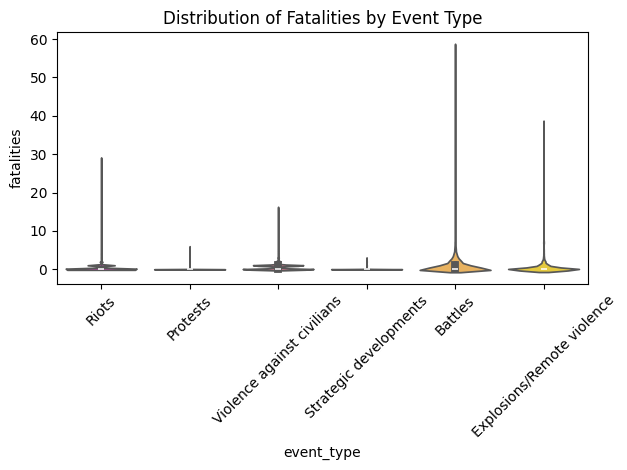

In [4]:
# Violin Plot of Fatalities by Event Type
sns.violinplot(x='event_type', y='fatalities', data=df, palette="spring")
plt.title("Distribution of Fatalities by Event Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
